# Resources

## Ketan Link
PySpark :- https://www.tutorialspoint.com/pyspark/index.htm 

## Found Some Good Respurces
2. PySpark - Since you are already comfortable with Python, you can start with the following PySpark resources:
- PySpark Tutorial from PySpark.org: https://spark.apache.org/docs/latest/api/python/getting_started/index.html
- PySpark Tutorial from DataCamp: https://www.datacamp.com/community/tutorials/apache-spark-python
- PySpark Tutorial from Analytics Vidhya: https://www.analyticsvidhya.com/blog/2016/09/comprehensive-introduction-to-apache-spark-rdds-dataframes-using-pyspark/

## My References:
PySpark -
* https://www.youtube.com/watch?v=cZS5xYYIPzk
* https://www.youtube.com/watch?v=_C8kWso4ne4


* `Spark` allows Parallel Computation:
PySpark just devides a big task into subtasks and run it into different machines. (good for working with large data)

* `PySpark` is Python API for `SPARK`

# Tutorials Point
 https://www.tutorialspoint.com/pyspark/index.htm

In [13]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## PySpark - RDD

RDD stands for Resilient Distributed Dataset, these are the elements that run and operate on multiple nodes to do parallel processing on a cluster. RDDs are immutable elements, which means once you create an RDD you cannot change it. RDDs are fault tolerant as well, hence in case of any failure, they recover automatically. You can apply multiple operations on these RDDs to achieve a certain task.

#### Pyspark RDD Class
(I dont know the use of this!)


```
class pyspark.RDD (
   jrdd, 
   ctx, 
   jrdd_deserializer = AutoBatchedSerializer(PickleSerializer())
)
```



#### Parallelize

In [1]:
from pyspark import SparkContext

# Create a new SparkContext
sc = SparkContext("local", "RDD Example")

# Create an RDD using parallelize() method
rdd = sc.parallelize([1, 2, 3, 4, 5])

# Print the RDD
print(rdd.collect())


[1, 2, 3, 4, 5]


#### count(): 
This method returns the number of elements in the RDD.

In [21]:
print(rdd.count())

5


#### collect(): 
This method retrieves all the elements of the RDD and returns them as a list.

In [22]:
# Collect all the elements of the RDD
elements = rdd.collect()

# Print the elements
print(elements)

[1, 2, 3, 4, 5]


#### foreach(f): 
It applies a function to each element in the RDD. 

In the following example, we print square of all the elements in the RDD.

In [24]:
def f(x):
  print(x**2)
print(rdd.foreach(f))

None


In [26]:
def f(x):
    print(x**2)

rdd.foreach(f)

#### Doubt:
Why is it not printing squares of each element ????

#### filter(f): 
It returns a new RDD containing the elements that satisfy the function inside the filter. In the following example, we filter out the strings containing "spark".

In [2]:
rdd_filtered = rdd.filter(lambda x: x>3)
print(rdd_filtered.collect())

[4, 5]


#### map()
map() is a PySpark operation that applies a function to each element of an RDD and returns a new RDD consisting of the results.

In [3]:
rdd_mapped = rdd.map(lambda word: (word, 1))
print(rdd_mapped.collect())

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


#### reduce()
The reduce() function is used to apply a function to all elements of an RDD and return a single result. It takes a function as an argument that accepts two parameters, and applies the function to each element of the RDD sequentially, accumulating the result. 

In [4]:
from operator import add
sum = rdd.reduce(add)
print(sum) # Output: 15

15


#### join()
The join() function is used to join two RDDs based on a common key. It returns a new RDD that contains all the key-value pairs from both RDDs where the key matches. The join operation is performed using an inner join, which means that only the key-value pairs that match in both RDDs are returned.

In [5]:
rdd1 = sc.parallelize([(1, 'A'), (2, 'B'), (3, 'C')])
rdd2 = sc.parallelize([(1, 'X'), (2, 'Y'), (4, 'Z')])
joined_rdd = rdd1.join(rdd2)
print(joined_rdd.collect()) # Output: [(1, ('A', 'X')), (2, ('B', 'Y'))]

[(2, ('B', 'Y')), (1, ('A', 'X'))]


#### cache(): 
The cache() function is used to cache an RDD in memory for faster access. Caching an RDD can improve performance if the RDD is used repeatedly in computations, as it avoids the overhead of re-computing the RDD every time it is used. The cache() function is lazy and does not actually cache the RDD until it is used in a computation.

In [6]:
rdd = sc.parallelize([1, 2, 3, 4, 5])
rdd.cache()
squared_rdd = rdd.map(lambda x: x*x)
print(squared_rdd.collect()) # Output: [1, 4, 9, 16, 25]

[1, 4, 9, 16, 25]


## PySpark - Broadcast & Accumulator

Apache Spark uses shared variables for parallel processing, which are copied on each node of the cluster to perform tasks. Two types of shared variables in Spark are Broadcast and Accumulator. 

Broadcast variables save a copy of data across all nodes, are cached on all machines, and not sent on machines with tasks. They are created using the Broadcast class, and the data is accessed using the 'value' attribute. For example, broadcasting a list of words in a PySpark application.

Accumulator variables aggregate information through associative and commutative operations, like summing up values or counting occurrences. They are created using the Accumulator class, and their value is accessed using the 'value' attribute. Accumulators can be used by multiple workers and are only usable in driver programs. For example, summing up values in a PySpark application.

#### Broadcast


Note BYME: Restart runtime here, (changing `SparkContext`)

In [ ]:
!pip install pyspark

##### Printing the words in the broadcasted list

In [1]:
from pyspark import SparkContext

sc = SparkContext("local", "Broadcast example")

# Create a list of words
words_list = ["scala", "java", "hadoop", "spark", "akka"]

# Broadcast the list of words to all worker nodes
words_broadcast = sc.broadcast(words_list)

# Define a function to check if a word is in the broadcasted list
def check_word(word):
    return word in words_broadcast.value

# Create an RDD of words
words_rdd = sc.parallelize(["scala", "python", "hadoop", "ruby", "spark"])

# Filter the RDD to keep only the words in the broadcasted list
filtered_rdd = words_rdd.filter(check_word)

# Print the filtered RDD
print(filtered_rdd.collect())

['scala', 'hadoop', 'spark']


Observation: Prints common values in `words_rdd` and `words_list`

#### Accumulator
(acts just like a variable, just syntax is different)

Note BYME: Restart runtime here, (changing `SparkContext`)

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pyspark import SparkContext

sc = SparkContext("local", "Accumulator example")

# Create an accumulator initialized to zero
total_acc = sc.accumulator(0)

# Define a function to add values to the accumulator
def add_to_total(x):
    global total_acc
    total_acc += x

# Create an RDD of numbers
numbers_rdd = sc.parallelize([1, 2, 3, 4, 5])

# Use foreach to apply the function to each element in the RDD
numbers_rdd.foreach(add_to_total)

# Print the accumulated value
print(total_acc.value)


15


## PySpark - SparkConf

In simple words, to run a Spark application on your computer or a cluster, you need to provide some settings or configurations. The SparkConf class helps you with that by providing a way to set those configurations. 

The SparkConf class has some setter methods that you can use to set different parameters. For example, you can set the application name or the master URL. Once you set these configurations, you can use them to create a SparkContext object, which is used to interact with the Spark cluster.

In the given example, the code sets the application name as "PySpark App" and the master URL to "spark://master:7077". This code creates a SparkConf object with these settings and then uses it to create a SparkContext object.

In [ ]:
# Import necessary modules
from pyspark import SparkConf, SparkContext

# Create a SparkConf object and set the application name and master URL
conf = SparkConf().setAppName("My PySpark App").setMaster("local[2]")
#  The "local[2]" means we are running the application in local mode with 2 worker threads.


# Create a SparkContext object with the above configuration
sc = SparkContext(conf=conf)
# we use the SparkConf object to create a SparkContext object. This SparkContext object is used to interact with the Spark cluster and run our PySpark application code.


# Your PySpark application code goes here
# ...

# Stop the SparkContext to release resources
sc.stop()
# Finally, we stop the SparkContext to release the resources used by the application. Note that the SparkConf object is immutable and cannot be modified once it's passed to the SparkContext object.



## PySpark - SparkFiles

In [5]:
# BYME: download csv from GitHub raw url link
import requests
def make_file(file_name, url):
  with open(file_name, "wb") as f:
    f.write(requests.get(url).content)

titanic_csv_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
make_file("titanic.csv", titanic_csv_url)

In [6]:
# Suppose you have a file called finddistance.R on your local machine at /titanic.csv and you want to add this file to SparkContext.
sc.addFile("titanic.csv")

# Now, you can get the path of the file on the worker node using SparkFiles.get(). For example, the following code will return the path of the finddistance.R file on the worker node:
from pyspark import SparkFiles
path = SparkFiles.get("titanic.csv")

## PySpark - StorageLevel
refer this link https://www.tutorialspoint.com/pyspark/pyspark_storagelevel.htm

## PySpark - MLlib
Apache Spark offers a Machine Learning API called MLlib. PySpark has this machine learning API in Python as well. It supports different kind of algorithms, which are mentioned below −

* mllib.classification − The spark.mllib package supports various methods for binary classification, multiclass classification and regression analysis. Some of the most popular algorithms in classification are Random Forest, Naive Bayes, Decision Tree, etc.

* mllib.clustering − Clustering is an unsupervised learning problem, whereby you aim to group subsets of entities with one another based on some notion of similarity.

* mllib.fpm − Frequent pattern matching is mining frequent items, itemsets, subsequences or other substructures that are usually among the first steps to analyze a large-scale dataset. This has been an active research topic in data mining for years.

* mllib.linalg − MLlib utilities for linear algebra.

* mllib.recommendation − Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user item association matrix.

* spark.mllib − It ¬currently supports model-based collaborative filtering, in which users and products are described by a small set of latent factors that can be used to predict missing entries. spark.mllib uses the Alternating Least Squares (ALS) algorithm to learn these latent factors.

* mllib.regression − Linear regression belongs to the family of regression algorithms. The goal of regression is to find relationships and dependencies between variables. The interface for working with linear regression models and model summaries is similar to the logistic regression case.



## PySpark - Serializers

Serialization is a way of converting data into a format that can be easily transferred over the network, stored on disk or in memory. It is important for improving performance in Apache Spark.

PySpark supports two serializers for performance tuning: MarshalSerializer and PickleSerializer. MarshalSerializer is faster but supports fewer data types while PickleSerializer is slower but supports almost any Python object.

In the example given, the data is serialized using MarshalSerializer in a PySpark script. The script creates a SparkContext object, which is the entry point of any Spark functionality, and then parallelizes a list of integers, doubles each integer using a lambda function, and returns the first 10 elements of the resulting RDD (Resilient Distributed Dataset). When the script is executed using the "spark-submit" command, it prints the output of the first 10 elements of the RDD.

Overall, serialization is an important concept in distributed computing and PySpark provides options for users to choose the right serializer based on their requirements.

In [1]:
# Note BYME: Restart runtime here, (changing `SparkContext`)
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pyspark.context import SparkContext
from pyspark.serializers import MarshalSerializer

# create a SparkContext object
sc = SparkContext("local", "serialization app", serializer=MarshalSerializer())

# create an RDD with a list of integers
data = sc.parallelize([1, 2, 3, 4, 5])

# double each integer using map transformation
doubled_data = data.map(lambda x: x * 2)

# collect the first 3 elements of the RDD and print them
print(doubled_data.take(3))

# stop the SparkContext
sc.stop()


[2, 4, 6]


# COMPLETED Tutorials Point
But Still some things remain unclear and not still fully comfortable with `pyspark`

# YouTube / The ONLY PySpark Tutorial You Will Ever Need.
`Moran Reznik`
`1.07K subscribers`

https://www.youtube.com/watch?v=cZS5xYYIPzk&t=310s

## Resilient Distributed DataSet (RDD)
In PySpark, Resilient Distributed Datasets (RDDs) are the fundamental building blocks for distributed data processing. RDDs are a distributed collection of objects that can be processed in parallel across multiple nodes in a cluster.

Here are some key points to keep in mind about RDDs:

RDDs are immutable, which means you can't modify the data once it has been created.
RDDs can be created from a variety of data sources, such as Hadoop Distributed File System (HDFS), local file systems, and external data sources like Apache Cassandra or Amazon S3.
RDDs can be transformed using various operations like map, filter, and reduce, which are executed in a distributed manner across the nodes in the cluster.
RDDs can be cached in memory to improve performance and reduce the amount of data that needs to be read from disk.
Overall, RDDs provide a powerful and flexible way to process large-scale data sets in a distributed environment using PySpark.

## Parts of PySpark
1. Spark SQL + DataFrames
2. Streaming
3. ML lib
4. GraphX

## Spark Architecture
Spark architecture in PySpark consists of the following components:

1. Driver Program: This is the main entry point for any Spark application. It runs the user code and creates a SparkContext that is used to coordinate tasks across the cluster.

2. Cluster Manager: This component manages the allocation of resources (CPU, memory, etc.) on the cluster for Spark tasks. Examples of cluster managers include Apache Mesos, Hadoop YARN, and Spark's built-in standalone cluster manager.

3. Executors: These are worker nodes that run tasks in parallel on the cluster. Executors are managed by the cluster manager and are responsible for running the actual computation on the data.

4. RDDs: Resilient Distributed Datasets (RDDs) are the primary data abstraction in PySpark. RDDs are distributed collections of data that can be processed in parallel across multiple nodes in the cluster.

5. DAG Scheduler: This component schedules the tasks that need to be executed to compute the final output of a Spark application. It constructs a Directed Acyclic Graph (DAG) of stages based on the transformations applied to the RDDs.

6. Task Scheduler: This component manages the scheduling and execution of individual tasks on the executors. It ensures that tasks are executed in the correct order and that data dependencies between tasks are satisfied.

7. Cache Manager: This component manages the caching of RDDs in memory to improve performance.

Overall, the Spark architecture in PySpark is designed to handle large-scale data processing by distributing the computation across a cluster of machines. It provides a flexible and efficient platform for building data processing applications that can scale to handle terabytes or even petabytes of data.

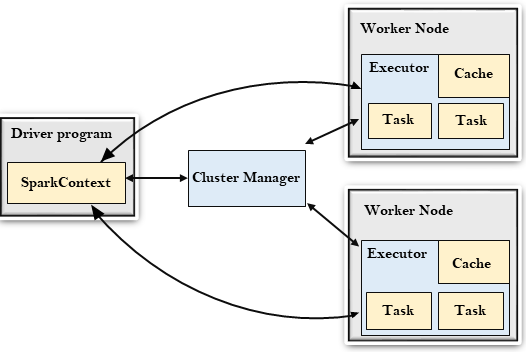

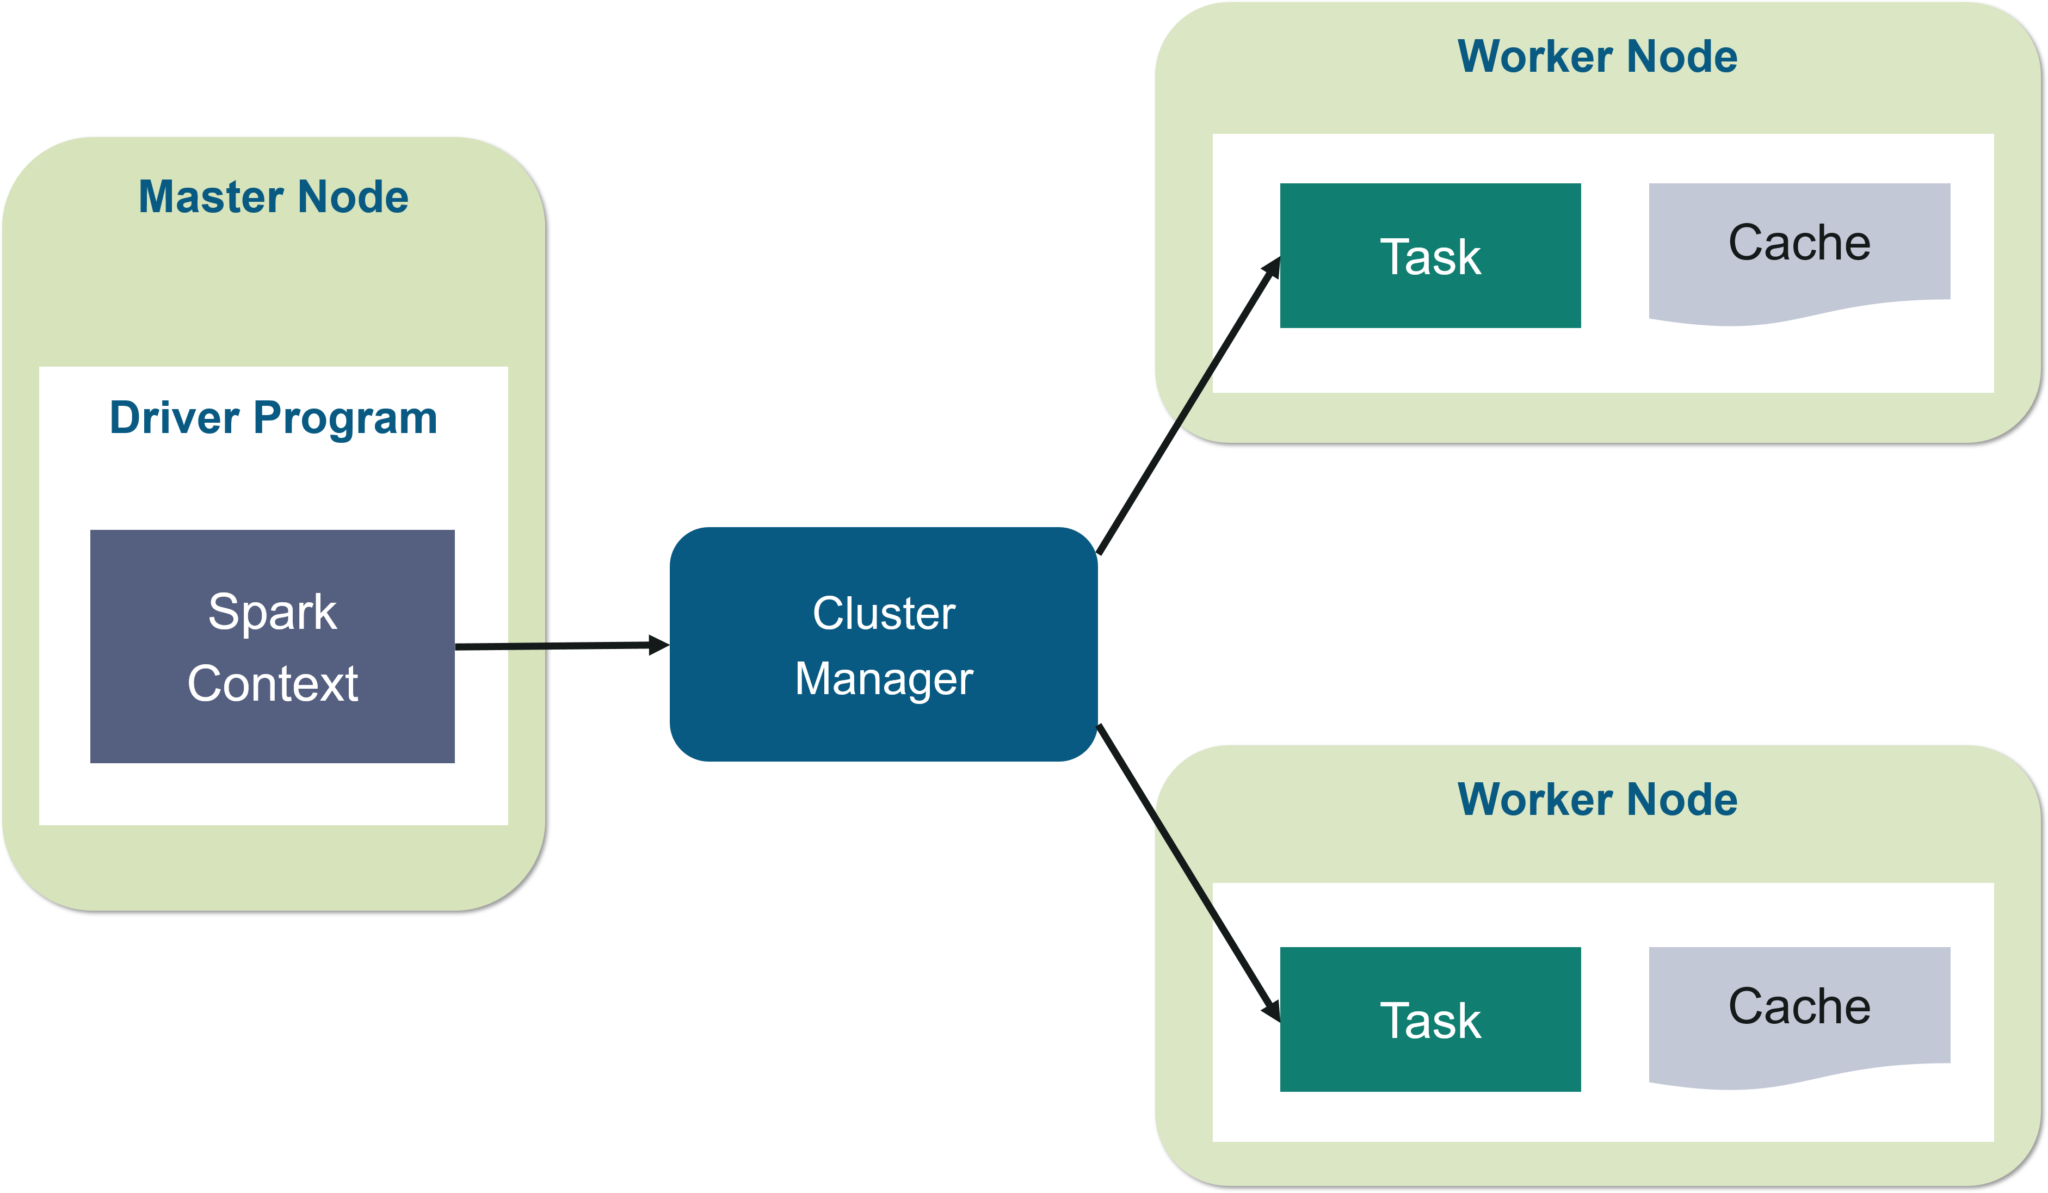

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=2fe2abde0bb17f81aee2837533b96ef80915b282d66fe0e8635df506a852e3ad
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
# Initiating a Spark Session
from pyspark.sql import SparkSession
sparkObj = SparkSession.builder.appName("testSession").getOrCreate()

In [ ]:
# Session Details
sparkObj

Observation: 
The `local[*]` denotes spark is using all (`*`) of local machine cores.

In [ ]:
# Downloading a csv file to colab

cars_url = "https://raw.githubusercontent.com/fbaptiste/python-deepdive/main/Part%202/Section%2013%20-%20Project%206/01%20-%20Project%20Description/cars.csv"
# download file from url link
import requests
def make_file(file_name, url):
  with open(file_name, "wb") as f:
    f.write(requests.get(url).content)

make_file("cars.csv", cars_url)

In [ ]:
# Printing some lines from csv file
import itertools
with open("cars.csv", "r") as f:
  lines = f.readlines()
  for line in itertools.islice(lines, 5):
    print(line, end="")

Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
Chevrolet Chevelle Malibu;18.0;8;307.0;130.0;3504.;12.0;70;US
Buick Skylark 320;15.0;8;350.0;165.0;3693.;11.5;70;US
Plymouth Satellite;18.0;8;318.0;150.0;3436.;11.0;70;US
AMC Rebel SST;16.0;8;304.0;150.0;3433.;12.0;70;US


In [ ]:
# Loading data from csv (all data types will be string by default here)
dataFrame_df = sparkObj.read.option("header","true").csv("cars.csv")

Note:
* `sparkObj.read` helps to read data
* `option("header","true")` denotes that first line is header

In [ ]:
# Loading data from csv (Assigning datatypes mamually)
schema = "Car STRING,MPG FLOAT, Cylinders INTEGER, Displacement FLOAT, Horsepower FLOAT, Weight FLOAT, Acceleration FLOAT, Model INTEGER, Origin STRING"
dataFrame_df_2 = sparkObj.read.csv("cars.csv",schema = schema, header=True)

In [ ]:
# Loading data from csv (telling it  to Assign datatypes automatically)
dataFrame_df_3 = sparkObj.read.csv("cars.csv",inferSchema = True, header=True)

Also there are some other important commands like `.save(file)` and `.mode("overwrte")`, but it need not to be written here. we can read the functioality of them over internet.

## Directed Acyclic Graph (DAG)
`8:00`

# YouTube / PySpark Tutorial
- freeCodeCamp.org

https://www.youtube.com/watch?v=_C8kWso4ne4

## Tutorial 1

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyspark

In [ ]:
# BYME: download csv from GitHub raw url link
import requests
def make_file(file_name, url):
  with open(file_name, "wb") as f:
    f.write(requests.get(url).content)

titanic_csv_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
make_file("titanic.csv", titanic_csv_url)

In [ ]:
import pandas as pd
pd.read_csv("titanic.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Start a PySpark Session

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
sparkSessionObj = SparkSession.builder.appName("appName_123").getOrCreate()

In [ ]:
sparkSessionObj

### Creating a Data Frame for PySpark

In [ ]:
df_pyspark = sparkSessionObj.read.csv("titanic.csv")

In [ ]:
df_pyspark.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|        _c0|     _c1|   _c2|                 _c3|   _c4| _c5|  _c6|  _c7|             _c8|    _c9| _c10|    _c11|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|  35|    0|    0|      

Problem: Header is also considered as data here.

Solution: use `.option("header", "true")` when defining Data Frame `df`

In [ ]:
df_pyspark = sparkSessionObj.read.option("header", "true").csv("titanic.csv")
print(df_pyspark)
print(type(df_pyspark))

DataFrame[PassengerId: string, Survived: string, Pclass: string, Name: string, Sex: string, Age: string, SibSp: string, Parch: string, Ticket: string, Fare: string, Cabin: string, Embarked: string]
<class 'pyspark.sql.dataframe.DataFrame'>


Problem: all datatypes are string above

Solution: Specify datatypes automatically using `inferSchema = True` or manually

In [ ]:
df_pyspark.head()

Row(PassengerId='1', Survived='0', Pclass='3', Name='Braund, Mr. Owen Harris', Sex='male', Age='22', SibSp='1', Parch='0', Ticket='A/5 21171', Fare='7.25', Cabin=None, Embarked='S')

In [ ]:
df_pyspark.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



## Tutorial 2: PySpark DataFrames

### Multiple ways of reading csv files
`continue from 18:00`

#### Method 1:

In [ ]:
# Specify datatypes automatically using inferSchema = True
df_pyspark = sparkSessionObj.read.option("header", "true").csv("titanic.csv", inferSchema = True)

In [ ]:
df_pyspark.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



#### Method 2
Better way to write same thing as `Method 1`

As we do'nt have to remember to use `.option`

In [ ]:
df_pyspark = sparkSessionObj.read.csv("titanic.csv",header = True ,inferSchema = True)
df_pyspark.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



#### What is a DataFrame ?

A DataFrame is a data structure used in data analysis that consists of rows and columns, similar to a table in a relational database. It is an abstraction in programming that enables us to manipulate data in a flexible and structured manner.

In technical terms, a DataFrame is a two-dimensional tabular data structure with columns of potentially different types, like a spreadsheet or SQL table. It is commonly used in data science and machine learning applications for data manipulation, transformation, and analysis.

A DataFrame in PySpark is a distributed data structure, which means that it can be spread across multiple nodes in a cluster and processed in parallel. This enables us to process large amounts of data efficiently and quickly.

Overall, a DataFrame provides a powerful and flexible way to work with structured data and is a core component of many data processing and machine learning workflows.


### Selecting rows
Use `.head(NumberOfRows)`

In [ ]:
df_pyspark.head(5)  # selecting first 5 rows

[Row(PassengerId=1, Survived=0, Pclass=3, Name='Braund, Mr. Owen Harris', Sex='male', Age=22.0, SibSp=1, Parch=0, Ticket='A/5 21171', Fare=7.25, Cabin=None, Embarked='S'),
 Row(PassengerId=2, Survived=1, Pclass=1, Name='Cumings, Mrs. John Bradley (Florence Briggs Thayer)', Sex='female', Age=38.0, SibSp=1, Parch=0, Ticket='PC 17599', Fare=71.2833, Cabin='C85', Embarked='C'),
 Row(PassengerId=3, Survived=1, Pclass=3, Name='Heikkinen, Miss. Laina', Sex='female', Age=26.0, SibSp=0, Parch=0, Ticket='STON/O2. 3101282', Fare=7.925, Cabin=None, Embarked='S'),
 Row(PassengerId=4, Survived=1, Pclass=1, Name='Futrelle, Mrs. Jacques Heath (Lily May Peel)', Sex='female', Age=35.0, SibSp=1, Parch=0, Ticket='113803', Fare=53.1, Cabin='C123', Embarked='S'),
 Row(PassengerId=5, Survived=0, Pclass=3, Name='Allen, Mr. William Henry', Sex='male', Age=35.0, SibSp=0, Parch=0, Ticket='373450', Fare=8.05, Cabin=None, Embarked='S')]

### Selecting Columns
Use `select("ColumnName")`

In [ ]:
df_pyspark_selected_columns = df_pyspark.select(["Name","Age"])
df_pyspark_selected_columns.show()

+--------------------+----+
|                Name| Age|
+--------------------+----+
|Braund, Mr. Owen ...|22.0|
|Cumings, Mrs. Joh...|38.0|
|Heikkinen, Miss. ...|26.0|
|Futrelle, Mrs. Ja...|35.0|
|Allen, Mr. Willia...|35.0|
|    Moran, Mr. James|null|
|McCarthy, Mr. Tim...|54.0|
|Palsson, Master. ...| 2.0|
|Johnson, Mrs. Osc...|27.0|
|Nasser, Mrs. Nich...|14.0|
|Sandstrom, Miss. ...| 4.0|
|Bonnell, Miss. El...|58.0|
|Saundercock, Mr. ...|20.0|
|Andersson, Mr. An...|39.0|
|Vestrom, Miss. Hu...|14.0|
|Hewlett, Mrs. (Ma...|55.0|
|Rice, Master. Eugene| 2.0|
|Williams, Mr. Cha...|null|
|Vander Planke, Mr...|31.0|
|Masselmani, Mrs. ...|null|
+--------------------+----+
only showing top 20 rows



### Checking datatypes
Use `.dtypes`

In [ ]:
df_pyspark.dtypes

[('PassengerId', 'int'),
 ('Survived', 'int'),
 ('Pclass', 'int'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'int'),
 ('Parch', 'int'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

### Checking Description
Values like mean, min, max, standard deviation can be checked using `.describe()`

In [ ]:
df_pyspark.describe().show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                null|  null| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

### Adding, Removing and Renaming Columns
* use `.withColumn("ColumnName", ColumnValues)` to add
* use `.drop("ColumnName")` to remove
* use `.withColumnRenamed("OldColumnName","NewColumnName")` to rename

In [ ]:
# example of adding a column
df_pyspark_added_column = df_pyspark.withColumn("Age(after 5 years)", df_pyspark["Age"]+5)
df_pyspark_added_column.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Age(after 5 years)|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|              27.0|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|              43.0|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|              31.0|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|              40.0|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|

## Tutorial 3: DataFrame - Handling Missing Values

### Dropping Null Values
* use `.na.drop()` to remove all rows having atleast one `null` or `NaN` value
* use `.na.drop(how="all")` to remove all rows having all `null` or `NaN` value

**Note:** By default, `how = "any"`

In [ ]:
df_pyspark.na.drop().show()

+-----------+--------+------+--------------------+------+----+-----+-----+-----------+--------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|     Ticket|    Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-----------+--------+-----------+--------+
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|   PC 17599| 71.2833|        C85|       C|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|     113803|    53.1|       C123|       S|
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|      17463| 51.8625|        E46|       S|
|         11|       1|     3|Sandstrom, Miss. ...|female| 4.0|    1|    1|    PP 9549|    16.7|         G6|       S|
|         12|       1|     1|Bonnell, Miss. El...|female|58.0|    0|    0|     113783|   26.55|       C103|       S|
|         22|       1|     2|Beesley, Mr. Lawr...|  male|34.0|  

`continue from 38:00`
### Dropping based atleast n non-null values are present
use `.na.drop(how="all", thresh=2)` for making sure atleat 2 non-null values are present

### Dropping rows if null values are present in a perticular column
use `.na.drop(how="all", subset["ColumnName"])` for making sure all rows having null values in `ColumnName` column are dropped

### Filling the Missing Values
* use `.na.fill("Text_To_Replace_All_Null_Values_in_df")`
* use `.na.fill("Text_To_Replace_Null_Values", ["ColumnName1", "ColumnName2"])` to replace null values in a perticular columns only


### Replacing null values with [mean, median etc.] of column (Imputer fn)

In [ ]:
from pyspark.ml.feature import Imputer

In [ ]:
imputerObj = Imputer(
                      inputCols=["Age", "Fare", "Survived"],
                      outputCols=["Age_imputed", "Fare_imputed", "Survived_imputed"]
                    ).setStrategy("mean")

imputerObj.fit(df_pyspark).transform(df_pyspark).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----------------+------------+----------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|      Age_imputed|Fare_imputed|Survived_imputed|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----------------+------------+----------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|             22.0|        7.25|               0|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|             38.0|     71.2833|               1|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|             26.0|       7.925|               1|
|          4|       1|

* Observation:
See above row with `PassengerId=20` at `Age` and `Age_imputed` colums, you will see the difference

* Note:
`pyspark.ml.feature.Imputer` does work only for numeric dataTypes (and not for strings)

## Tutorial 4: DataFrame - Filter
`continue from 48:00`

### Use .filter()
- using `.filter("ColumnName>=200")`
- using `.filter(df_pyspark["ColumnName"]>=10)`

In [ ]:
df_pyspark.filter("Age>=50").show()

+-----------+--------+------+--------------------+------+----+-----+-----+-----------+--------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|     Ticket|    Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-----------+--------+-----+--------+
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|      17463| 51.8625|  E46|       S|
|         12|       1|     1|Bonnell, Miss. El...|female|58.0|    0|    0|     113783|   26.55| C103|       S|
|         16|       1|     2|Hewlett, Mrs. (Ma...|female|55.0|    0|    0|     248706|    16.0| null|       S|
|         34|       0|     2|Wheadon, Mr. Edwa...|  male|66.0|    0|    0| C.A. 24579|    10.5| null|       S|
|         55|       0|     1|Ostby, Mr. Engelh...|  male|65.0|    0|    1|     113509| 61.9792|  B30|       C|
|         95|       0|     3|   Coxon, Mr. Daniel|  male|59.0|    0|    0|     364500|    7.25| null|       S|
|

In [ ]:
# filtering and showing only selected columns
df_pyspark.filter("Age>=50").select(["Name", "Age"]).show()

+--------------------+----+
|                Name| Age|
+--------------------+----+
|McCarthy, Mr. Tim...|54.0|
|Bonnell, Miss. El...|58.0|
|Hewlett, Mrs. (Ma...|55.0|
|Wheadon, Mr. Edwa...|66.0|
|Ostby, Mr. Engelh...|65.0|
|   Coxon, Mr. Daniel|59.0|
|Goldschmidt, Mr. ...|71.0|
|Connors, Mr. Patrick|70.5|
|White, Mr. Perciv...|54.0|
|Bateman, Rev. Rob...|51.0|
|    Meo, Mr. Alfonzo|55.5|
|Williams, Mr. Cha...|51.0|
|Van der hoef, Mr....|61.0|
|Smith, Mr. James ...|56.0|
|Isham, Miss. Ann ...|50.0|
|Lurette, Miss. Elise|58.0|
|Green, Mr. George...|51.0|
|Sjostedt, Mr. Ern...|59.0|
|Carter, Rev. Erne...|54.0|
|Stead, Mr. Willia...|62.0|
+--------------------+----+
only showing top 20 rows



In [ ]:
# similarly using another method
df_pyspark.filter(df_pyspark["Age"]>=50).select(["Name", "Age"]).show()

+--------------------+----+
|                Name| Age|
+--------------------+----+
|McCarthy, Mr. Tim...|54.0|
|Bonnell, Miss. El...|58.0|
|Hewlett, Mrs. (Ma...|55.0|
|Wheadon, Mr. Edwa...|66.0|
|Ostby, Mr. Engelh...|65.0|
|   Coxon, Mr. Daniel|59.0|
|Goldschmidt, Mr. ...|71.0|
|Connors, Mr. Patrick|70.5|
|White, Mr. Perciv...|54.0|
|Bateman, Rev. Rob...|51.0|
|    Meo, Mr. Alfonzo|55.5|
|Williams, Mr. Cha...|51.0|
|Van der hoef, Mr....|61.0|
|Smith, Mr. James ...|56.0|
|Isham, Miss. Ann ...|50.0|
|Lurette, Miss. Elise|58.0|
|Green, Mr. George...|51.0|
|Sjostedt, Mr. Ern...|59.0|
|Carter, Rev. Erne...|54.0|
|Stead, Mr. Willia...|62.0|
+--------------------+----+
only showing top 20 rows



Similarly, we can use `and` and `or` while defining contitions

Note: please use `'&' for 'and'`, `'|' for 'or'`, `'~' for 'not'` when building DataFrame boolean expressions.

Note: Brackets`() & ()` are necessary while defining conditions
* `df_pyspark.filter(df_pyspark["Age"]>=20 & df_pyspark["Age"]<=40).select(["Name", "Age", "Fare"]).show()` throws error
* while `df_pyspark.filter((df_pyspark["Age"]>=20) & (df_pyspark["Age"]<=23)).select(["Name", "Age", "Fare"]).show()` works perfectly fine

In [ ]:
df_pyspark.filter((df_pyspark["Age"]>=20) & (df_pyspark["Age"]<=23)).select(["Name", "Age", "Fare"]).show()

+--------------------+----+-------+
|                Name| Age|   Fare|
+--------------------+----+-------+
|Braund, Mr. Owen ...|22.0|   7.25|
|Saundercock, Mr. ...|20.0|   8.05|
|Cann, Mr. Ernest ...|21.0|   8.05|
|Nosworthy, Mr. Ri...|21.0|    7.8|
|   Rugg, Miss. Emily|21.0|   10.5|
|Sirayanian, Mr. O...|22.0| 7.2292|
|Hood, Mr. Ambrose Jr|21.0|   73.5|
|Waelens, Mr. Achille|22.0|    9.0|
|Fortune, Miss. Ma...|23.0|  263.0|
|Andreasson, Mr. P...|20.0| 7.8542|
|Greenfield, Mr. W...|23.0|63.3583|
|White, Mr. Richar...|21.0|77.2875|
|Salkjelsvik, Miss...|21.0|   7.65|
|Barton, Mr. David...|22.0|   8.05|
|Jussila, Miss. Ka...|20.0|  9.825|
|Pekoniemi, Mr. Ed...|21.0|  7.925|
|Hickman, Mr. Stan...|21.0|   73.5|
|Coelho, Mr. Domin...|20.0|   7.05|
|  Richard, Mr. Emile|23.0|15.0458|
|Nysten, Miss. Ann...|22.0|   7.75|
+--------------------+----+-------+
only showing top 20 rows



## Tutorial 5: GroupBy and Aggregation

#### Using groupBy (merging rows to group by a selected single value of a perticular Column provided)

In [ ]:
# Grouped by age to find sum of fare of a perticular age group
df_pyspark.groupBy("Age").sum("Fare").show()

+----+------------------+
| Age|         sum(Fare)|
+----+------------------+
| 8.0|             113.2|
|70.0|              81.5|
| 7.0|           95.0625|
|20.5|              7.25|
|49.0|          359.5751|
|29.0|          541.8165|
|40.5|             22.25|
|64.0|             289.0|
|47.0|248.41250000000002|
|42.0|          482.6334|
|24.5|              8.05|
|44.0|267.82500000000005|
|35.0|1607.6249999999998|
|null| 3922.066300000001|
|62.0|             143.6|
|18.0| 989.6499999999999|
|80.0|              30.0|
|34.5|            6.4375|
|39.0| 513.2665999999999|
| 1.0|210.04169999999996|
+----+------------------+
only showing top 20 rows



In [ ]:
# Grouped by age to find count of people of a perticular age group
df_pyspark.groupBy("Age").count().show()

+----+-----+
| Age|count|
+----+-----+
| 8.0|    4|
|70.0|    2|
| 7.0|    3|
|20.5|    1|
|49.0|    6|
|29.0|   20|
|40.5|    2|
|64.0|    2|
|47.0|    9|
|42.0|   13|
|24.5|    1|
|44.0|    9|
|35.0|   18|
|null|  177|
|62.0|    4|
|18.0|   26|
|80.0|    1|
|34.5|    1|
|39.0|   14|
| 1.0|    7|
+----+-----+
only showing top 20 rows



#### using Aggrigate (getting single value by processing a column)
`.agg(Dictionary of key:value)`
where, Key is `"ColumnName"` and value is attribute like `"sum"` or `"mean"`

In [ ]:
df_pyspark.agg({"Age": "sum", "Fare": "mean"}).show()

+--------+----------------+
|sum(Age)|       avg(Fare)|
+--------+----------------+
|21205.17|32.2042079685746|
+--------+----------------+



In [ ]:
df_pyspark.agg({"Age": "sum", "Age":"mean" , "Fare": "mean"}).show()

+-----------------+----------------+
|         avg(Age)|       avg(Fare)|
+-----------------+----------------+
|29.69911764705882|32.2042079685746|
+-----------------+----------------+



#####Observation Byme:
Multiple `.agg` operations cannot be done on a single column in same dataframe

## Example of PySpark ML

#####Note (sources)
Click on Examples on https://spark.apache.org/mllib/ , has amazing doccumentation

### MLib
When considering `MLib` there are 2 different techniqes:
1. RDD
2. DataFrame APIs

We are gonna focus on DataFrame APIs (and not RDD)

### Unimportant revision

In [ ]:
# taking a look at the dataframe
df_pyspark.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [ ]:
df_pyspark.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
df_pyspark.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



### Started New Stuff from here

### Joining multiple columns to make another column independent of those inputCols

`VectorAssembler` makes sure that the indivisual features are grouped to form an independent feature

For Eg.
`["Ticket", "Cabin", "Fare"]` ---> new feature (independent)

`continue from 1:07:00`

In [ ]:
from pyspark.ml.feature import VectorAssembler
VectorAssemblerObj = VectorAssembler(
                                      inputCols = ["Ticket", "Cabin", "Fare"],
                                     outputCol = "Independent Features Column"
                                    )

In [ ]:
output_df = VectorAssemblerObj.transform(df_pyspark)
output_df.show()

IllegalArgumentException: ignored

Observation: String Not supported

In [ ]:
from pyspark.ml.feature import VectorAssembler
VectorAssemblerObj = VectorAssembler(
                                      inputCols = ["Age", "Fare"],
                                     outputCol = "Independent Features Column"
                                    )

output_df = VectorAssemblerObj.transform(df_pyspark)
output_df.show()

Py4JJavaError: ignored

Observation:
Above `Py4JJavaError` is due to null values present in `"Age"` and `"Fare"` Columns.

In [ ]:
from pyspark.ml.feature import VectorAssembler
VectorAssemblerObj = VectorAssembler(
                                      inputCols = ["Survived", "Parch"],
                                     outputCol = "Combined Features Column (Independent of input Columns)"
                                    )

output_df = VectorAssemblerObj.transform(df_pyspark)
output_df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------------------------------------------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Combined Features Column (Independent of input Columns)|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------------------------------------------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|                                              (2,[],[])|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|                                              [1.0,0.0]|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|                               

`continue from 1:10:00`

### Linear Regression

In [ ]:
df_pyspark_forRegression = output_df.select(["Combined Features Column (Independent of input Columns)","PassengerId"])
df_pyspark_forRegression.show()

+-------------------------------------------------------+-----------+
|Combined Features Column (Independent of input Columns)|PassengerId|
+-------------------------------------------------------+-----------+
|                                              (2,[],[])|          1|
|                                              [1.0,0.0]|          2|
|                                              [1.0,0.0]|          3|
|                                              [1.0,0.0]|          4|
|                                              (2,[],[])|          5|
|                                              (2,[],[])|          6|
|                                              (2,[],[])|          7|
|                                              [0.0,1.0]|          8|
|                                              [1.0,2.0]|          9|
|                                              [1.0,0.0]|         10|
|                                              [1.0,1.0]|         11|
|                   

In [ ]:
from pyspark.ml.regression import LinearRegression

train_data, test_data = df_pyspark_forRegression.randomSplit([0.75, 0.25])   # 75% data to train, while 25% data to test
regressor = LinearRegression(
                              featuresCol="Combined Features Column (Independent of input Columns)",
                             labelCol= "PassengerId"
                            )
regressorTrainedModel = regressor.fit(train_data)  

In [ ]:
regressorTrainedModel.coefficients

DenseVector([-13.9653, 0.3407])

In [ ]:
regressorTrainedModel.intercept

452.4695744717373

#### Using trained model to predict on test data
use `.evaluate(test_data)`

In [ ]:
predicted_results = regressorTrainedModel.evaluate(test_data)
predicted_results.predictions.show()

+-------------------------------------------------------+-----------+-----------------+
|Combined Features Column (Independent of input Columns)|PassengerId|       prediction|
+-------------------------------------------------------+-----------+-----------------+
|                                              (2,[],[])|          1|452.4695744717373|
|                                              (2,[],[])|          6|452.4695744717373|
|                                              (2,[],[])|         34|452.4695744717373|
|                                              (2,[],[])|         35|452.4695744717373|
|                                              (2,[],[])|         36|452.4695744717373|
|                                              (2,[],[])|         46|452.4695744717373|
|                                              (2,[],[])|         52|452.4695744717373|
|                                              (2,[],[])|         58|452.4695744717373|
|                               

In [ ]:
predicted_results.meanAbsoluteError, predicted_results.meanSquaredError

(227.24349859626446, 67449.12658655229)

## Using DataBricks
`continue from 1:12:00`
Helps with working on Big Data using cloud platforms

Go to https://databricks.com/try-databricks to get started for free (Community Version)

`continue from 1:15:30`